Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Zander Bonnet"

---

# Homework 9

Run the code given below to create 500 simulated 2-dimensional observations ```X``` and corresponding true labels ```y_true```. True labels range from 0 to 3. We're using 60\% of these data as our training data to fit the model and will reserve the remaining 200 points (40\% of 500) as our validation data. 

Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. The training data are shown as round circles, whereas the validation data are shown as stars. 

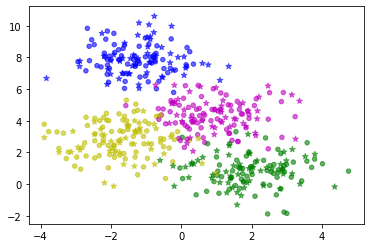

In [2]:
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4,
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0) 


np.random.seed(10)
train_X, val_X, train_y, val_y = train_test_split(X, y_true, test_size=0.4)

fig, ax = plt.subplots()
colors = ('m', 'g', 'y', 'b')
ax.scatter(train_X[:, 0], train_X[:, 1], c = [colors[train_y[i]] for i in range(len(train_y))], s=20, alpha = 0.6)
ax.scatter(val_X[:, 0], val_X[:, 1], marker = "*", c = [colors[val_y[i]] for i in range(len(val_y))], alpha = 0.6); 

## Problem 1

(a) Consider the data (X,y_true) that were simulated above to be your training data. Use the Gaussian Naive Bayes algorithm to predict the label color of the point x with coordinates (0,2) "by-hand" (that is, without using any SciKitLearn methods). Show your work. It's ok to use Numpy. You can compute multivariate normal densities using the ```scipy.stats``` module or by using your calculator. Please state which method you used in your answer.  

Optional code box:

In [3]:
# YOUR CODE HERE
S1 = np.cov(X[y_true == 0].T) # Get variances/covariance for all groups
S2 = np.cov(X[y_true == 1].T) 
S3 = np.cov(X[y_true == 2].T)
S4 = np.cov(X[y_true ==3].T)
mu1 = np.mean(X[y_true == 0], axis = 0) #Get the mean for all groups
mu2 = np.mean(X[y_true == 1], axis = 0)
mu3 = np.mean(X[y_true == 2], axis = 0)
mu4 = np.mean(X[y_true ==3], axis = 0)


from scipy import stats
rv1 = stats.multivariate_normal(mu1, S1) #Calculate the densities for all groups
p1 = rv1.pdf((0,2)) # Calculate the probabilities of the point (0,2) for all groups
print(p1)

rv2 = stats.multivariate_normal(mu2, S2)
p2 = rv2.pdf((0,2))
print(p2)

rv3 = stats.multivariate_normal(mu3, S3)
p3 = rv3.pdf((0,2))
print(p3)

rv4 = stats.multivariate_normal(mu4, S4)
p4 = rv4.pdf((0,2))
print(p4)

max(p1,p2,p3,p4) #Find the largest probability

0.005693171336234362
0.013048400419952786
0.02459102411066093
8.243027727121616e-10


0.02459102411066093

Explain your code or show your work and state your answer here. If you are not using Python, but some other approach, make sure you explain how you come up with your answer. 

Because the clusters are all of equal size you can treat the one with the highest pdf probobility as the group it is assigned to. In this case that would be group 3 which is yellow.

(b) Use SciKit-Learn to apply the Gaussian Naive Bayes classification algorithm to all points in the validation (or testing) data set and create a predicted label for each point. Produce a scatterplot of the points in the validation data set, colored by the predicted group labels. 

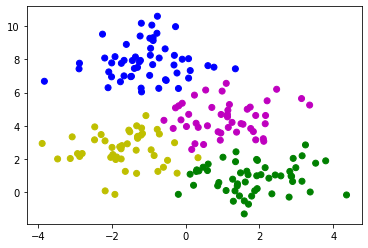

In [4]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB 
import matplotlib.pyplot as plt
model = GaussianNB()
model.fit(train_X, train_y);

y_class = model.predict(val_X)
fig, ax = plt.subplots()
ax.scatter(val_X[:,0], val_X[:,1], c = [colors[y_class[i]] for i in range(len(y_class))]);

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from (b)) to the true labels. Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the Gaussian Naive Bayes algorithm?

0.945

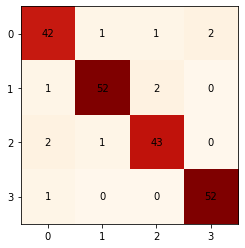

In [5]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(val_y,y_class)

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(len(set(train_y)))) # define tick-mark positions
ax.set_yticks(np.arange(len(set(val_y))))

for i in range(len(set(val_y))): # Loop over data dimensions and create text annotations:
    for j in range(len(set(train_y))):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");
        
np.sum(np.diag(mat))/np.sum(mat)

.945 is the percentage of corectly classified points

## Problem 2

(a) Using the same training data simulated above (```train_X```) fit the k-means clustering algorithm (with k=4). Use the fitted model to cluster the validation data into k=4 clusters. For the resulting four clusters, use a majority vote over the true ```val_y``` labels to assign each cluster a label. 

**Hint:** we did something extremely similar in the clustering/classification of handwritten digits example we did in class. 

In [6]:
# YOUR CODE HERE
from sklearn.cluster import KMeans 
from scipy.stats import mode
kmeans = KMeans(n_clusters=4)
kmeans.fit(train_X)
y_class2 = kmeans.predict(val_X)

labels = np.zeros_like(y_class2)
for i in range(4):
    mask = (y_class2 == i) # pick out data one cluster at a time
    labels[mask] = mode(val_y[mask])[0] 
labels

array([1, 1, 0, 1, 3, 3, 0, 0, 1, 1, 3, 0, 2, 3, 1, 1, 1, 0, 1, 2, 3, 3,
       0, 0, 0, 3, 2, 3, 0, 2, 2, 2, 3, 2, 3, 0, 3, 1, 0, 1, 1, 3, 1, 2,
       0, 3, 1, 2, 1, 3, 2, 3, 1, 1, 0, 2, 1, 0, 2, 0, 1, 3, 0, 2, 0, 1,
       2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 3, 3, 3, 0, 3, 1, 1, 0, 1, 3, 3,
       2, 0, 1, 0, 0, 1, 3, 3, 1, 2, 0, 3, 1, 1, 0, 2, 1, 1, 1, 3, 1, 0,
       2, 1, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 0, 3, 2, 3, 1, 1, 3, 3, 2, 3,
       0, 3, 3, 2, 0, 0, 3, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 3, 3,
       1, 2, 0, 1, 2, 2, 0, 0, 3, 2, 3, 2, 0, 2, 2, 2, 1, 3, 2, 0, 3, 3,
       0, 2, 1, 2, 0, 1, 2, 2, 3, 1, 3, 2, 1, 2, 0, 3, 1, 0, 3, 3, 1, 0,
       3, 0], dtype=int32)

(b) Produce another scatterplot showing the 200 points in ```val_X``` and use the labels produced in Problem 2 (a) to color the points. 

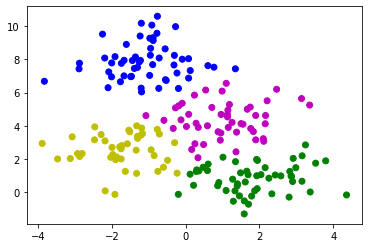

In [7]:
# YOUR CODE HERE
fig, ax = plt.subplots()
ax.scatter(val_X[:,0], val_X[:,1], c = [colors[labels[i]] for i in range(len(labels))]);

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 2 (b)) to the true labels ```train_y```.  Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the k-means algorithm (with following majority vote over true labels)?

0.94

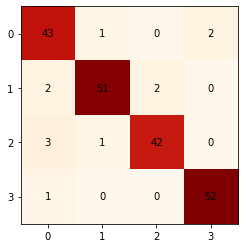

In [8]:
from sklearn.metrics import confusion_matrix
mat2 = confusion_matrix(val_y,labels)

fig, ax = plt.subplots()
ax.imshow(mat2, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(len(set(train_y)))) # define tick-mark positions
ax.set_yticks(np.arange(len(set(val_y))))

for i in range(len(set(val_y))): # Loop over data dimensions and create text annotations:
    for j in range(len(set(train_y))):
        text = ax.text(j, i, mat2[i, j], ha="center", va="center", color="k");
        
np.sum(np.diag(mat2))/np.sum(mat2)

.94 is the percentage of corectly classified points

## Problem 3

(a) Use SciKit-Learn to fit a decision tree to the simulated training data ```(train_X, train_y)```. Set the ```max_depth``` of the tree to 3 (to make three nodes in your tree and end up with four different "leaves" on your tree). Use your fitted tree to predict the labels for the observations in the validation data. 

In [9]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=4) # growing the tree by at most four levels
tree.fit(train_X, train_y)

y_class3 = tree.predict(val_X)
y_class3

array([1, 1, 0, 1, 3, 3, 0, 0, 1, 1, 3, 0, 2, 3, 1, 1, 1, 0, 1, 2, 3, 3,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 3, 2, 3, 0, 3, 1, 0, 1, 1, 3, 1, 2,
       0, 0, 2, 2, 1, 3, 2, 3, 1, 1, 0, 2, 1, 0, 2, 0, 1, 3, 0, 2, 1, 1,
       2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 3, 3, 3, 0, 0, 1, 1, 0, 1, 3, 3,
       2, 0, 1, 0, 0, 1, 3, 3, 1, 2, 2, 3, 1, 1, 0, 2, 1, 1, 0, 3, 1, 0,
       2, 1, 0, 2, 3, 1, 1, 3, 2, 3, 3, 0, 0, 0, 2, 3, 1, 1, 3, 3, 2, 3,
       0, 3, 3, 2, 0, 0, 3, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 3, 3,
       1, 2, 0, 1, 2, 2, 0, 0, 3, 2, 3, 2, 0, 2, 2, 2, 1, 3, 2, 1, 3, 3,
       0, 2, 1, 2, 3, 1, 2, 2, 3, 1, 3, 2, 1, 2, 0, 0, 1, 0, 3, 3, 1, 2,
       3, 0])

(b) Produce another scatterplot showing the 200 points in ```val_X``` and use the labels produced by the Decision Tree procedure in Problem 4 (a) to color the points. 

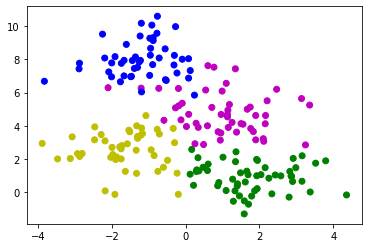

In [10]:
# YOUR CODE HERE
fig, ax = plt.subplots()
ax.scatter(val_X[:,0], val_X[:,1], c = [colors[y_class3[i]] for i in range(len(y_class3))]);

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 4 (a)) to the true labels ```val_y``` from our simulation. Which percentage of points are predicted correctly by the decision tree? Display your confusion matrix as a heat map like we did in class. 

0.915

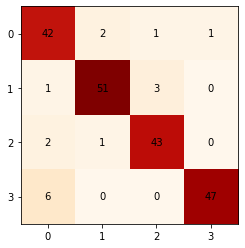

In [11]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
mat3 = confusion_matrix(val_y,y_class3)

fig, ax = plt.subplots()
ax.imshow(mat3, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(len(set(train_y)))) # define tick-mark positions
ax.set_yticks(np.arange(len(set(val_y))))

for i in range(len(set(val_y))): # Loop over data dimensions and create text annotations:
    for j in range(len(set(train_y))):
        text = ax.text(j, i, mat3[i, j], ha="center", va="center", color="k");
        
np.sum(np.diag(mat3))/np.sum(mat3)

.915 is the percentage of corectly classified points

## Problem 4

Describe what differences you observe between the three different methods you applied. What differences can you see in the three scatter plots in terms of shapes of predicted point clouds? Based on how the three different classification methods work, which one is expected to do best on differentiating between our simulated "blobs"? Which method works best on the simulated data? How can you tell how well the methods work? 

1st - The points are mostly seperated but there is some slight overlap in colors between yellow, pink and green.
2nd - The points have almost 0 overlap between groups. All the groups are very seperated
3rd - There is a lot of overlap between blue and pink and slight overlaap between pink, yellow and green.

Since the data was genrated aas 4 blobs I would expect kmeans to do the best job at differnetitating between the two. Especailly becasue there is not a lot of overlap in the original data between the 4 blobs. In the end thoough Naive Bayes slightly out preformed kmeans, and both out preformed the decison tree. I can deduce this by looking at the proportion of correctly assigned points. The method with the highest sucess rate is the one that prefomed the best.